In [1]:
# Read in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spotify = pd.read_csv('spotify.csv')

/var/folders/kl/jtbbpqbs317ds_rc806vd7h40000gn/T/ipykernel_58110/681569860.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
'''using the average we can make model like linear regression, decision tree, or forest

cleared_data = pd.read_csv('spotify.csv').drop(columns=['track_id', 'key']).dropna(how='any')

cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 'popular' if x > 75 else 'not_popular')

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_to_keep = ['popularity','duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_to_keep]

# Reshape the data to long format
long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')

# Calculate the mean for each feature and diagnosis
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()

# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')

# Print the result
print(wide_means)

# create a blx plot
# Create a box plot
sns.set(style="whitegrid")
g = sns.FacetGrid(long_data, col='feature', col_wrap=2, margin_titles=True,
                  xlim=(long_data['value'].min(), long_data['value'].max()))
g.map(sns.boxplot, 'value', 'popularity', 'popularity', order=['popular', 'not_popular'],
      hue_order=['popular', 'not_popular'], palette={"popular": "tomato", "not_popular": "cyan"})
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()  # Remove the legend
plt.show()
'''

'using the average we can make model like linear regression, decision tree, or forest\n\ncleared_data = pd.read_csv(\'spotify.csv\').drop(columns=[\'track_id\', \'key\']).dropna(how=\'any\')\n\ncleared_data[\'popularity\'] = cleared_data[\'popularity\'].apply(lambda x: \'popular\' if x > 75 else \'not_popular\')\n\n# Convert True to 1 and False to 0 in the "popularity" column\ncleared_data[\'explicit\'] = cleared_data[\'explicit\'].astype(int)\n\n# Remove duplicates based on track name\ncleared_data = cleared_data.drop_duplicates(subset=[\'track_name\'])\n\n# Convert milliseconds to seconds\ncleared_data[\'duration_s\'] = cleared_data[\'duration_ms\'] / 1000\n\n# List of columns you want to keep\ncolumns_to_keep = [\'popularity\',\'duration_s\', \'explicit\', \'danceability\', \'energy\', \'loudness\', \'speechiness\',\n                   \'acousticness\', \'instrumentalness\', \'liveness\', \'valence\', \'tempo\']\n\ncolumns_to_get_mean = [\'duration_s\', \'explicit\', \'danceability\

In [3]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
"""
Looking at the table above.
Popularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.
25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental
75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks
"""

'\nLooking at the table above.\nPopularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.\n25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental\n75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks\n'

In [5]:
track_count = len(spotify.track_name.unique())
track_count

73602

In [6]:
# find duplicates
duplicate_rows = spotify[spotify.duplicated(['track_name'])]
len(duplicate_rows)

40398

In [7]:
# drop duplicates
spotify = spotify.drop_duplicates(subset=['track_name'])
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3,world-music
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


#### Genre Analysis 

In [8]:
genres = spotify.track_genre.unique()
len(genres)

113

/var/folders/kl/jtbbpqbs317ds_rc806vd7h40000gn/T/ipykernel_58110/4199940341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify, x='track_genre', order=spotify['track_genre'].value_counts().index, palette='rainbow')


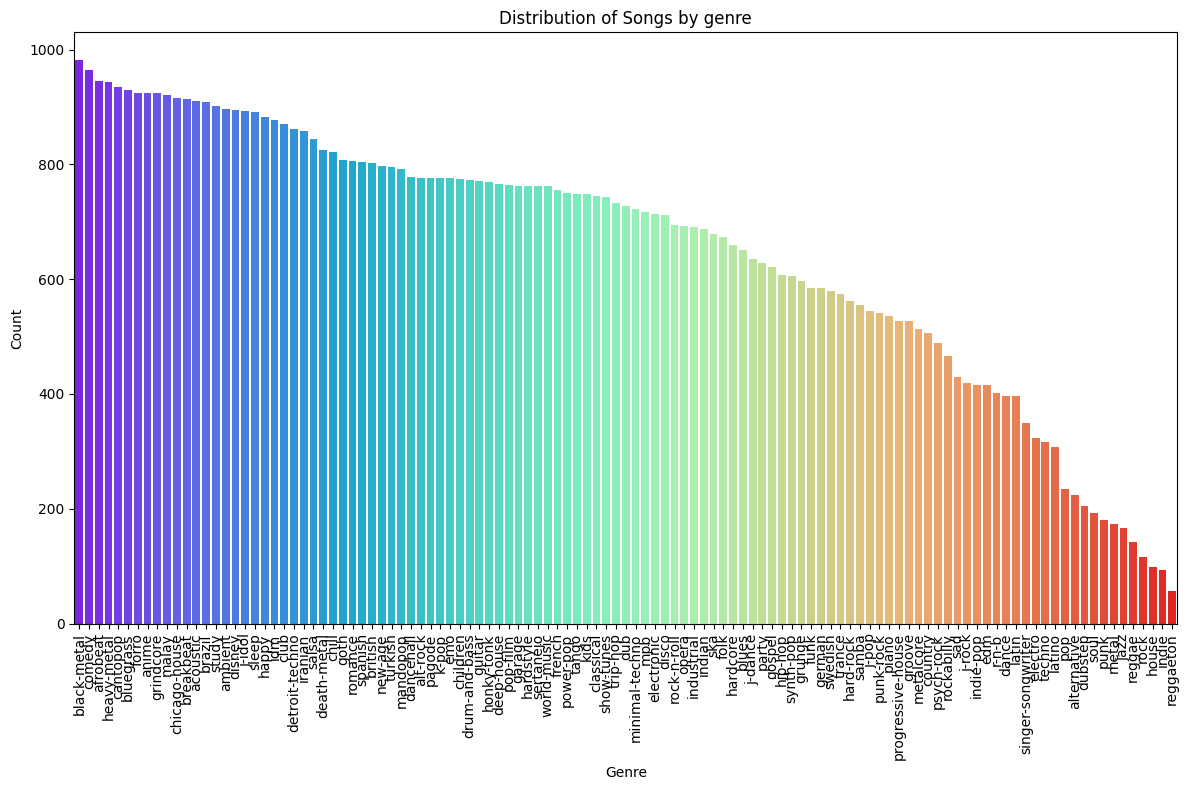

In [9]:
# Distribution of Songs by genre
plt.figure(figsize=(12, 8))
sns.countplot(data=spotify, x='track_genre', order=spotify['track_genre'].value_counts().index, palette='rainbow')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Songs by genre')
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

In [10]:
"""
Look into more songs in the genres with the highest count to discover popular and trending tracks.
Black metal, comedy and Afrobeats have the highest frequencies.

"""
# for exact numbers
genre_count = spotify['track_genre'].value_counts()
genre_count

track_genre
black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
              ... 
reggae         142
rock           116
house           98
indie           93
reggaeton       56
Name: count, Length: 113, dtype: int64

#### Genre Vs Dancebility (or any other feature)

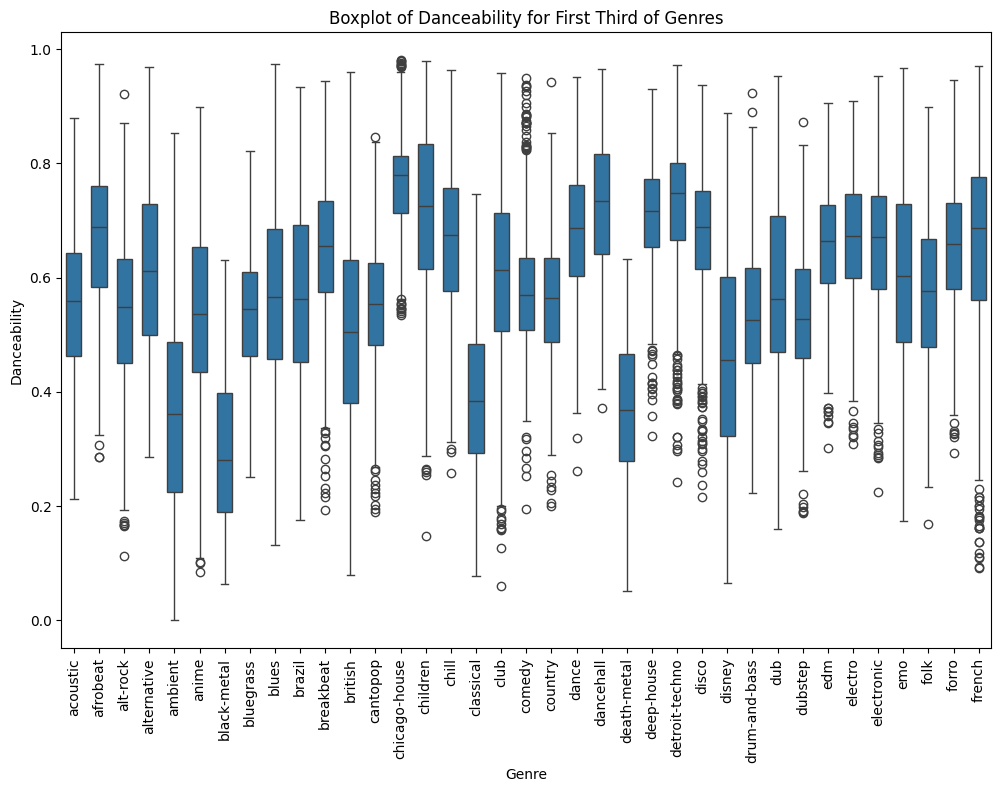

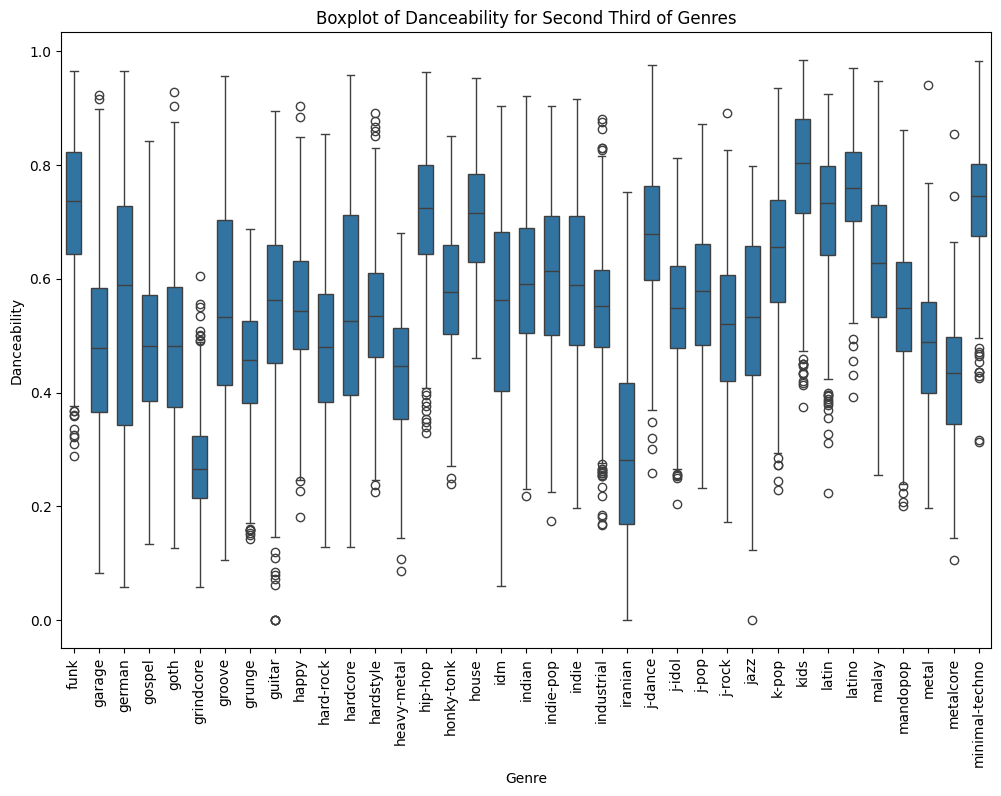

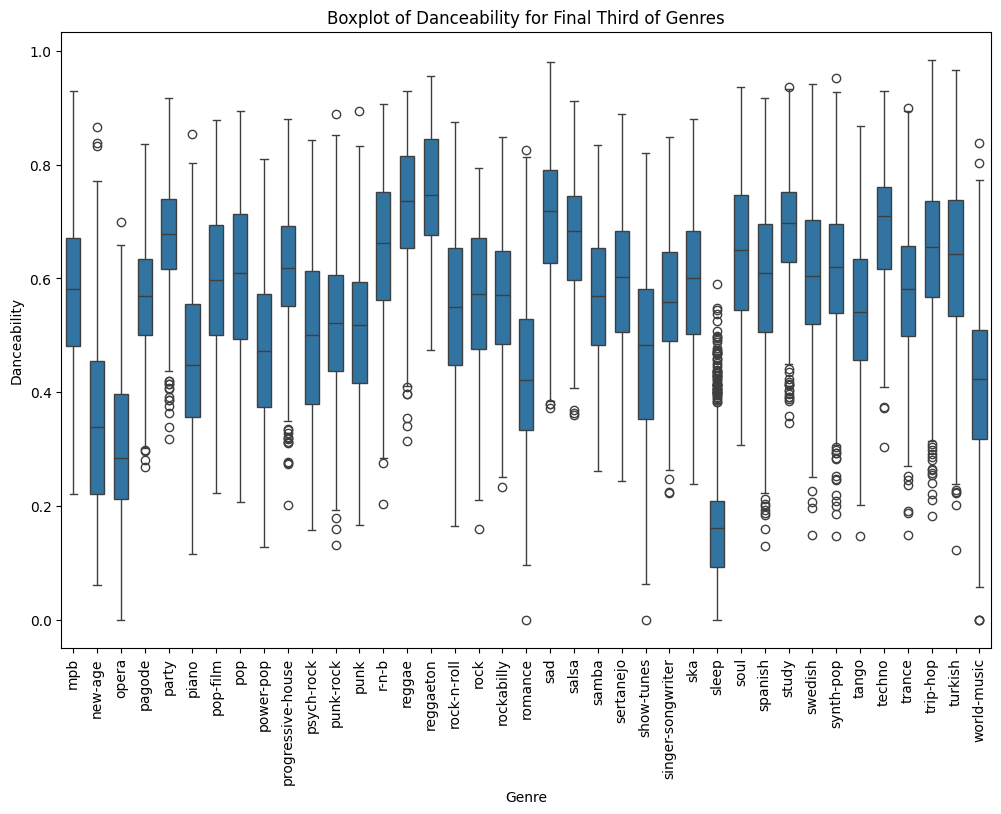

In [11]:
def create_genre_boxplot(data, title):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data, x='track_genre', y='danceability', width=0.6)
    plt.xlabel('Genre')
    plt.ylabel('Danceability')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

third = len(genres) // 3
genres1 = genres[:third]
genres2 = genres[third:2*third]
genres3 = genres[2*third:]

subset1 = spotify[spotify['track_genre'].isin(genres1)]
create_genre_boxplot(subset1, 'Boxplot of Danceability for First Third of Genres')

subset2 = spotify[spotify['track_genre'].isin(genres2)]
create_genre_boxplot(subset2, 'Boxplot of Danceability for Second Third of Genres')

subset3 = spotify[spotify['track_genre'].isin(genres3)]
create_genre_boxplot(subset3, 'Boxplot of Danceability for Final Third of Genres')

In [12]:
"""
interpret boxplot:
genres with low dancibility 
gerres with high dancibility 
can do with other features too

maybe drop irrelevent genres
"""

'\ninterpret boxplot:\ngenres with low dancibility \ngerres with high dancibility \ncan do with other features too\n\nmaybe drop irrelevent genres\n'

#### Audio

In [13]:
# instrumentalness
count = spotify['instrumentalness'].value_counts()[0]
count

23775

In [14]:
# replce 0 with means
spotify['instrumentalness'] = spotify['instrumentalness'].replace(0, spotify['instrumentalness'].mean())
print(spotify['instrumentalness'])

0         0.000001
1         0.000006
2         0.184390
3         0.000071
4         0.184390
            ...   
113994    0.022900
113995    0.928000
113996    0.976000
113997    0.184390
113999    0.184390
Name: instrumentalness, Length: 73602, dtype: float64


In [18]:
# convert explicit to boolean -  where 0 is False and 1 is True
spotify['explicit'] = spotify['explicit'].astype(int)
spotify['explicit']
#explicit_tracks = spotify[spotify['explicit'] == 1]
#print(explicit_tracks.head(1)) 

                  track_id           artists          album_name  \
59  2gRKq9rIC5i1zuxp06zJWH  Chord Overstreet  What's Left of You   

            track_name  popularity  duration_ms  explicit  danceability  \
59  What's Left of You          57       178600         1         0.731   

    energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
59   0.507    0    -6.477     1        0.046         0.572           0.18439   

    liveness  valence    tempo  time_signature track_genre  
59    0.0912    0.265  117.969               4    acoustic  
